In [154]:
# Here we import the required Python libraries for data analysis and visualization: pandas for data manipulation, matplotlib for plotting, and numpy for numerical computing
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from haversine import haversine
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error,r2_score

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [120]:
 Heere we read in two CSV files ('RwandaDistrictRainfall.csv' and 'RwandaDistrictVegetation.csv') as pandas dataframes (rwanda_rainfall and rwanda_vegetation), then we remove missing values from 
# each dataframe using the dropna() method with specific parameters for axis (0 for rows and 1 for columns).

rwanda_rainfall= pd.read_csv('RwandaDistrictRainfall.csv')
rwanda_vegetation= pd.read_csv('RwandaDistrictVegetation.csv')

# print(rwanda_rainfall.shape)
# print(rwanda_vegetation.shape)

# print(rwanda_rainfall)
# print(rwanda_vegetation)

rwanda_rainfall=rwanda_rainfall.dropna()  # This line removes all rows with missing values from the rwanda_rainfall dataframe
rwanda_vegetation=rwanda_vegetation.dropna(axis=1)  # This line removes all columns with missing values from the rwanda_vegetation dataframe

# print(rwanda_rainfall.shape)
# print(rwanda_vegetation.shape)

# print(rwanda_vegetation)
# print(rwanda_rainfall)

In [121]:
# In this we extract the first column values from the rwanda_rainfall dataframe and store them in the districts_rainfall list.We also extract the first row values from the same dataframe 
# and store them in the months_rainfall list. We then do the same for the rwanda_vegetation dataframe, extracting the first column values and storing them in the districts_vegetation list,
# and extracting the first row values and storing them in the months_vegetation list. Finally, we print the four resulting lists

# extract first column values from rwanda_rainfall dataframe
districts_rainfall = [rwanda_rainfall.iloc[i,0] for i in range(1,31)]
print("districts_rainfall", districts_rainfall)

# extract first row values from rwanda_rainfall dataframe
months_rainfall = [rwanda_rainfall.iloc[0,i] for i in range(181)]
print("months_rainfall", months_rainfall)

# extract first column values from rwanda_vegetation dataframe
districts_vegetation = [rwanda_vegetation.iloc[i,0] for i in range(1,31)]
print("districts_vegetation", districts_vegetation)

# extract first row values from rwanda_vegetation dataframe
months_vegetation = [rwanda_vegetation.iloc[0,i] for i in range(177)]
print("months_vegetation", months_vegetation)

districts_rainfall ['Nyarugenge', 'Gasabo', 'Kicukiro', 'Nyanza', 'Gisagara', 'Nyaruguru', 'Huye', 'Nyamagabe', 'Ruhango', 'Muhanga', 'Kamonyi', 'Karongi', 'Rutsiro', 'Rubavu', 'Nyabihu', 'Ngororero', 'Rusizi', 'Nyamasheke', 'Rulindo', 'Gakenke', 'Musanze', 'Burera', 'Gicumbi', 'Rwamagana', 'Nyagatare', 'Gatsibo', 'Kayonza', 'Kirehe', 'Ngoma', 'Bugesera']
months_rainfall ['Month', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'JAN', 'FEB', 'MAR', 'APR', 

In [122]:
# Here we rename the columns of the rwanda_rainfall and rwanda_vegetation dataframes to the values in the months_rainfall and months_vegetation lists. We then creates new
# dataframes rwanda_rainfall2 and rwanda_vegetation2 by removing the first row of the original dataframes, which contains the month and district names. The two new dataframes are converted to pandas
# DataFrames using pd.DataFrame(). We have used the set_index() method to set the indices of the rwanda_rainfall2 and rwanda_vegetation2 dataframes to "Month" and "District", respectively. After that we
# create copies of the two dataframes, rwanda_rainfall2 and rwanda_vegetation2, which are stored in rainfall and vegetation, respectively. The display() function is used to display the two dataframes
rwanda_rainfall.columns=months_rainfall
rwanda_vegetation.columns=months_vegetation
rwanda_rainfall2= rwanda_rainfall.drop(index=0)
rwanda_vegetation2= rwanda_vegetation.drop(index=0)
rwanda_rainfall2=pd.DataFrame(rwanda_rainfall2)
rwanda_vegetation2=pd.DataFrame(rwanda_vegetation2)
rwanda_rainfall2=rwanda_rainfall2.set_index(['Month'])
rwanda_vegetation2=rwanda_vegetation2.set_index(['District'])
display("rwanda_rainfall2", rwanda_rainfall2)
display("rwanda_vegetation2", rwanda_vegetation2)
rainfall = rwanda_rainfall2.copy()
vegetation = rwanda_vegetation2.copy()

'rwanda_rainfall2'

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,...,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
Month,,,,,,,,,,,,,,,,,,,,,
Nyarugenge,52.9,52.9,100.0,103.9,84.4,15.6,11.8,17.6,29.4,117.6,...,135.3,121.7,43.2,23.5,11.8,50.9,72.6,105.9,113.8,66.7
Gasabo,52.9,60.4,113.3,103.1,74.9,17.6,11.8,23.5,29.4,131.0,...,156.0,132.5,47.1,19.2,11.8,51.4,74.9,113.3,123.5,72.1
Kicukiro,52.2,60.8,107.1,106.1,84.6,17.2,11.8,21.8,29.4,125.5,...,146.1,122.8,40.9,22.8,11.8,50.5,69.4,110.5,117.6,68.9
Nyanza,52.9,52.9,100.0,105.9,82.4,17.6,11.8,17.6,29.4,117.6,...,135.3,117.6,41.2,23.5,11.8,52.9,70.6,105.9,111.8,64.7
Gisagara,51.1,58.8,104.6,107.7,74.4,17.6,11.8,21.4,29.4,125.5,...,142.0,127.6,37.9,21.3,11.8,43.8,59.7,118.3,124.6,65.9
Nyaruguru,52.9,52.9,100.0,100.0,88.2,11.8,11.8,17.6,29.4,117.6,...,135.3,129.4,47.1,23.5,11.8,47.1,76.5,105.9,117.6,70.6
Huye,52.9,52.9,100.0,105.9,82.4,17.6,11.8,17.6,29.4,117.6,...,135.3,117.6,41.2,23.5,11.8,52.9,70.6,105.9,111.8,64.7
Nyamagabe,52.9,53.9,101.0,105.9,81.4,17.6,11.8,18.6,29.4,118.6,...,136.3,118.6,41.2,23.5,11.8,52.0,68.6,107.8,113.7,64.7
Ruhango,52.9,52.9,100.0,104.7,83.5,16.5,11.8,17.6,29.4,117.6,...,135.3,120.0,42.4,23.5,11.8,51.8,71.8,105.9,112.9,65.9


'rwanda_vegetation2'

,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,JAN,FEB,...,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
District,,,,,,,,,,,,,,,,,,,,,
Nyarugenge,127.1335578,114.1946582,97.70739397,95.6993281,88.72996508,94.39622571,126.3125955,141.5359033,124.0947907,130.9202862,...,113.5968727,133.5323565,128.0716025,116.1183069,102.4158842,98.55087277,113.8274487,119.2340887,130.368276,119.3100344
Gasabo,134.2743651,121.7468629,101.7610175,96.82107909,89.28289474,96.75327337,132.5650692,144.3224277,123.5728731,130.0179049,...,115.2305092,133.1912077,131.8758071,114.5605264,98.38763667,94.16093452,113.13286,116.2225775,129.540706,125.1903701
Kicukiro,127.1976424,112.7092868,95.87081035,93.06527811,86.07576657,90.36217265,123.7391273,146.5379682,124.0225344,128.1799224,...,112.6646457,130.9590942,126.1412432,108.4875877,96.01755808,93.20558862,107.2355295,107.6467842,127.4850245,118.0183972
Nyanza,130.4075654,115.4760824,100.6323569,95.5655591,92.3354103,97.44238706,128.4067634,142.4029331,121.2875262,128.7814277,...,124.8438243,141.7545787,127.0757298,117.4069556,107.4815961,101.1194758,112.5017959,116.7108726,123.9542577,124.504017
Gisagara,124.8776285,113.0878269,100.303528,97.35343347,94.04727794,96.44231587,120.5451908,139.3206309,124.6692066,129.3746716,...,122.378951,139.4817396,129.7025921,115.649987,101.0564055,95.38798995,99.38707174,116.9339847,127.2393951,126.9944472
Nyaruguru,129.6223645,122.6006955,111.2817847,102.5606031,104.0604661,111.548633,118.5863931,130.6704898,122.3492041,122.91174,...,131.5708759,137.8287837,117.217116,123.9767329,115.8049681,106.4813293,118.1106207,114.1687235,114.5449266,125.7016144
Huye,126.3618628,113.8752434,97.9911595,93.18905041,92.2657809,97.49992317,117.1865485,132.1773956,117.4588827,120.2681305,...,122.2654198,137.088027,121.4025916,114.5778402,104.6253319,97.37199998,104.3536074,109.8755958,122.7300579,124.6258138
Nyamagabe,128.071805,122.7266892,109.5242075,101.4714064,101.832852,112.1069885,116.786192,127.4438224,122.0544699,122.943083,...,131.7217154,137.309751,117.1247211,122.6311793,117.40781,108.9784361,117.1179184,111.469853,114.9533912,127.9292606
Ruhango,132.4418465,117.9845853,102.5604878,97.98432886,93.23430608,98.78744324,127.341304,139.8841771,122.843567,126.0985031,...,122.0068246,141.3005874,128.3861364,119.7785914,110.4851098,105.0989208,115.4977838,115.889171,125.5708164,124.8245938


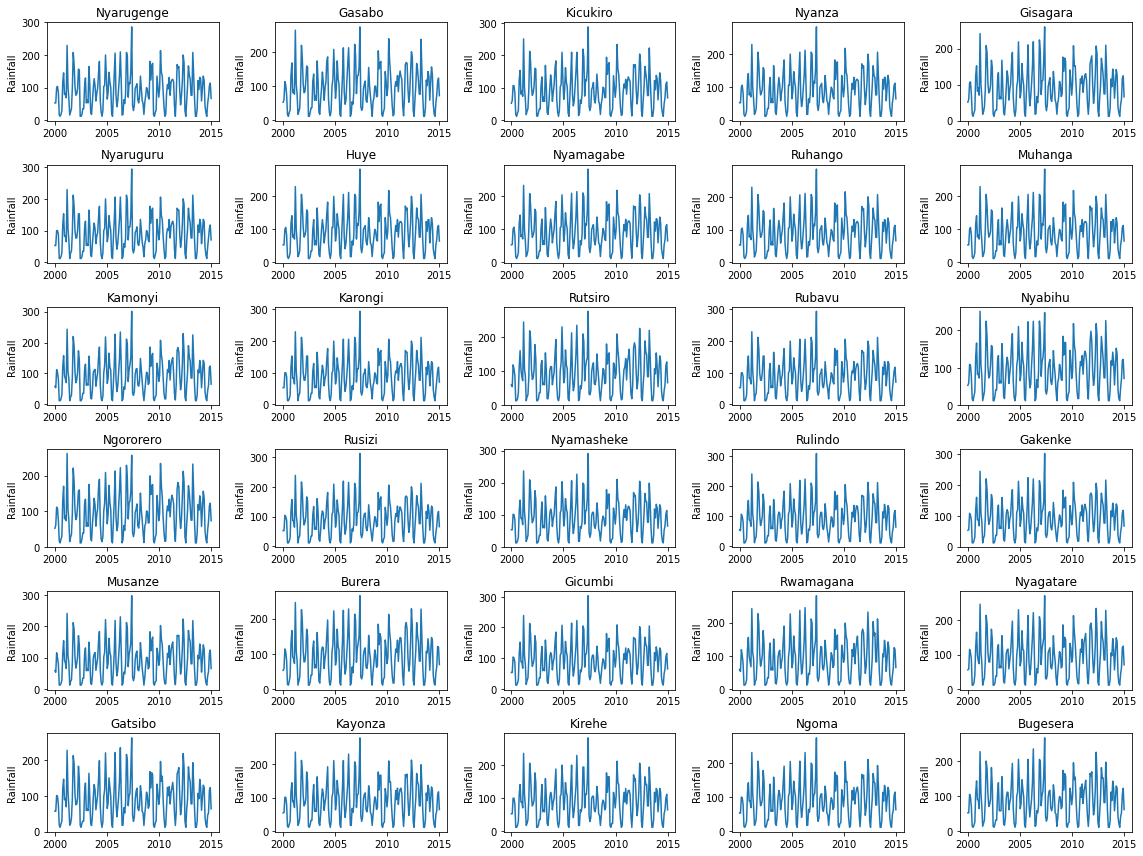

In [123]:
# Here we create a subplot grid of line plots for rainfall data for each district in Rwanda. The data dataframe is iterated over, and a line graph is plotted for each district.
#  The x-axis shows the years 2000 to 2015, with 180 data points, and the y-axis shows the rainfall data. At the end, plt.tight_layout() is called to pack the subplots closely.
def plot_subplots_rainfall(ax,data,ylabel):
    for i in range (0,data.shape[0]):
        ax[i//5,i%5].plot(np.linspace(2000,2015,180),data.iloc[i,:].values.astype("float32"))
        ax[i//5,i%5].set_title(data.index[i])
        ax[i//5,i%5].set_ylabel(ylabel)
    plt.tight_layout()

fig, ax= plt.subplots(nrows=6, ncols=5, figsize=(16,12))
plot_subplots_rainfall(ax,rwanda_rainfall2,'Rainfall')

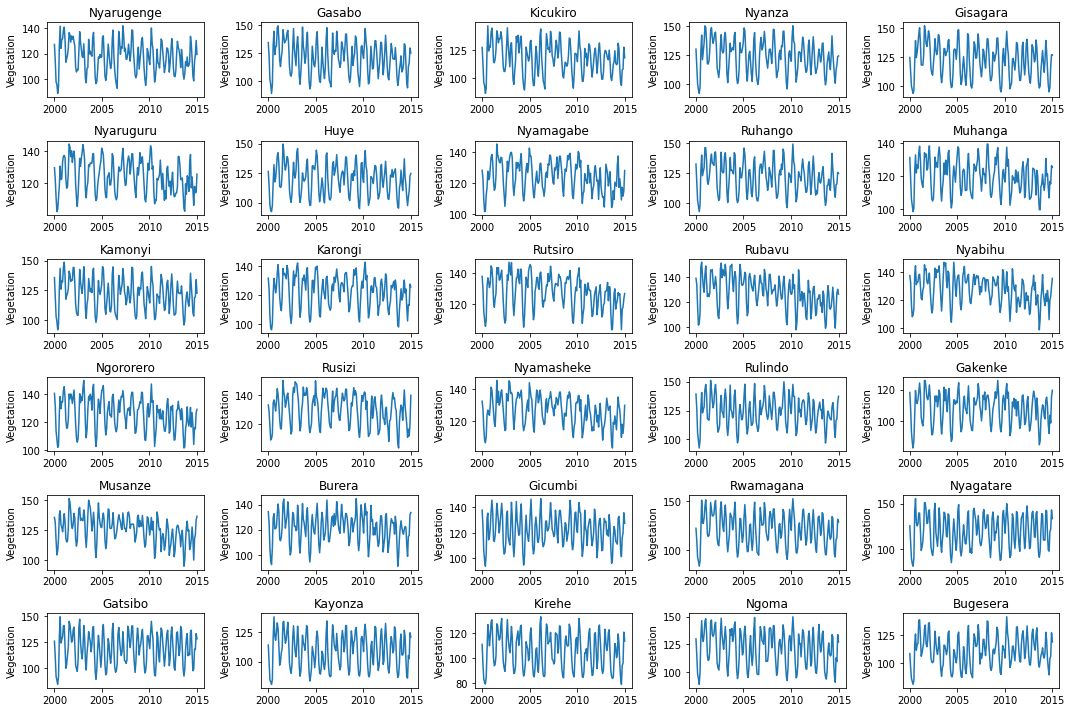

In [124]:
# Here we define a function to create a subplot grid of line plots for vegetation data for each district in Rwanda. The data dataframe is iterated over, and a line graph is plotted 
# for each district. The x-axis shows the years 2000 to 2015, with 176 data points, and the y-axis shows the vegetation data. At the end, the function sets subplot titles and ylabels and 
# plt.tight_layout() is called to pack the subplots closely
def plot_subplots_rainfall(ax,data,ylabel):
    for i in range (0,data.shape[0]):
        ax[i//5,i%5].plot(np.linspace(2000,2015,176),data.iloc[i,:].values.astype("float32"))
        ax[i//5,i%5].set_title(data.index[i])
        ax[i//5,i%5].set_ylabel(ylabel)
    plt.tight_layout()

fig, ax= plt.subplots(nrows=6, ncols=5, figsize=(15,10))
plot_subplots_rainfall(ax,rwanda_vegetation2,'Vegetation')

In [125]:
# Here we extract unique values from the first row of the rwanda_rainfall dataframe starting from the second column until the end. We have used list function to convert the returned numpy array into 
# a Python list. This list is then assigned to the variable months_rainfall. Finally, we store months_rainfall and print using the print function
months_rainfall = list(rwanda_rainfall.iloc[0,1:].unique())
print("months_rainfall", months_rainfall)

months_rainfall ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']


In [126]:
# Here we compute the mean, median, minimum, and maximum values of rainfall for each month. We first initialize four empty lists to store the values. Then, for each month in the months_rainfall list, 
# we calculate and append the corresponding mean, median, minimum, and maximum values of rainfall to the respective lists using NumPy functions. We compute the values from the rwanda_rainfall2 DataFrame

mean_rainfall = [np.mean(rwanda_rainfall2[i].values.astype('float')) for i in months_rainfall]
median_rainfall = [np.median(rwanda_rainfall2[i].values.astype('float')) for i in months_rainfall]
min_rainfall = [np.min(rwanda_rainfall2[i].values.astype('float')) for i in months_rainfall]
max_rainfall = [np.max(rwanda_rainfall2[i].values.astype('float')) for i in months_rainfall]


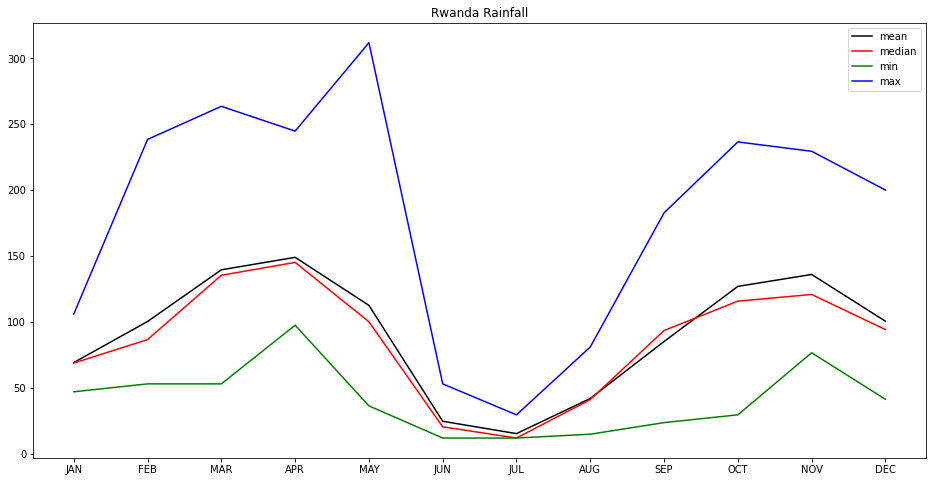

In [127]:
# Here we plot four lines on a single graph using the matplotlib. The plt.plot function is called for each set of data, with the label argument used to distinguish between them. 
# We hav given the graph a title with plt.title, the legend is shown with plt.legend, and the graph is displayed using plt.show
plt.figure(figsize=(16,8))
plt.plot(months_rainfall,mean_rainfall,label='mean', c = "black")
plt.plot(months_rainfall,median_rainfall,label='median', c = "red")
plt.plot(months_rainfall,min_rainfall,label='min', c = "green")
plt.plot(months_rainfall,max_rainfall,label='max', c = "blue")
plt.title('Rwanda Rainfall')
plt.legend()
plt.show()

In [128]:
# Here we extract all unique values from the first row of the "rwanda_vegetation" dataframe except the first column. We then convert the result into a list and assign it to the "months_vegetation"
# variable. Finally, we print the values of the "months_vegetation" list
months_vegetation = list(rwanda_vegetation.iloc[0,1:].unique())
print("months_vegetation", months_vegetation)

months_vegetation ['MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'JAN', 'FEB', 'MAR', 'APR']


In [129]:
# Here we calculate mean, median, minimum, and maximum values of vegetation for each month. We initialize empty lists for each of these values. We then loops through the months in the 
# months_vegetation list and calculate these values for each month using the corresponding column in the rwanda_vegetation2 dataframe, and then we append the values to the respective list.
mean_vegetation=[]
median_vegetation=[]
min_vegetation=[]
max_vegetation=[]
for i in months_vegetation:
    mean_vegetation.append(np.mean(rwanda_vegetation2[i].values.astype('float')))
    median_vegetation.append(np.median(rwanda_vegetation2[i].values.astype('float')))
    min_vegetation.append(np.min(rwanda_vegetation2[i].values.astype('float')))
    max_vegetation.append(np.max(rwanda_vegetation2[i].values.astype('float')))

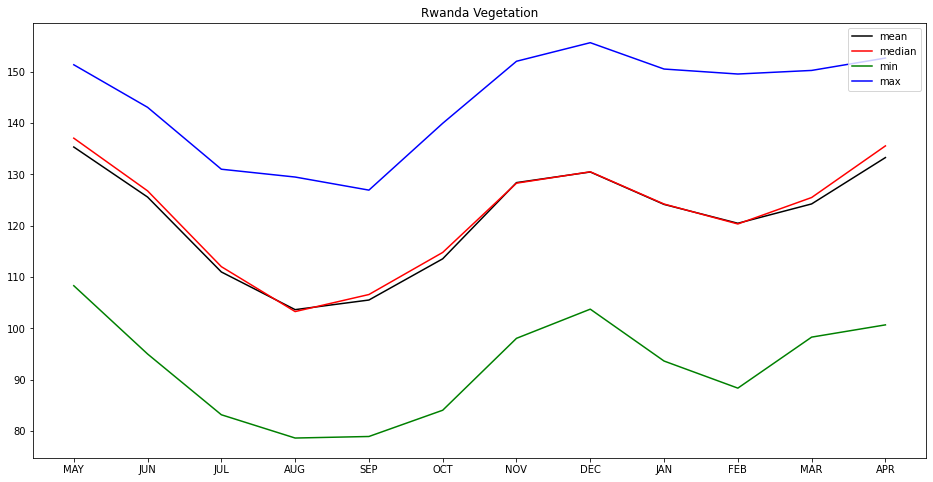

In [130]:
# Here we create a figure with a size of 16x8 inches and plot four lines using the data stored in the variables mean_vegetation, median_vegetation, min_vegetation, and max_vegetation against the 
# months_vegetation variable. Each line is given a different color and label. At the end, a title and legend are added to the plot and it is displayed. Here we visualized the variation of 
# vegetation in Rwanda over time.
plt.figure(figsize=(16,8))
plt.plot(months_vegetation,mean_vegetation,label='mean', c = "black")
plt.plot(months_vegetation,median_vegetation,label='median', c = "red")
plt.plot(months_vegetation,min_vegetation,label='min', c = "green")
plt.plot(months_vegetation,max_vegetation,label='max', c = "blue")
plt.title('Rwanda Vegetation')
plt.legend(loc='upper right')
plt.show()

In [131]:
! pip install haversine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [132]:
# Here we are using the pd.read method to read the file which has the distances among the districts
rwanda_centroid= pd.read_csv("RwandaDistrictCentroidsLongitude_Latitude.csv")

In [133]:
# Here we initialize a 30x30 array with zeros, then we loop over every combination of indices (i,j) in the array. For each index combination, we extract the latitude and longitude of the 
# corresponding centroid from a pandas dataframe called "rwanda_centroid". We compute the Haversine distance between the two points using the "haversine" function from the "haversine" library,
# and store the result in the (i,j) position of the array. The resulting "distance_matrix" array contains the pairwise distances between all centroids
distance_matrix= np.zeros((30,30))
for i in range(30):
    for j in range(30):
        lat1, lon1= rwanda_centroid.iloc[i]['Latitude'], rwanda_centroid.iloc[i]['Longitude']
        lat2,lon2= rwanda_centroid.iloc[j]['Latitude'], rwanda_centroid.iloc[j]['Longitude']
        distance_matrix[i,j]= haversine((lat1,lon1),(lat2,lon2))

In [134]:
# We first convert the distance_matrix variable into a pandas DataFrame using the pd.DataFrame() function. It makes it easy for us in indexing and manipulation of the data. 
# The print(distance_matrix.shape) statement then prints the shape of the resulting DataFrame, which is a tuple representing the number of rows and columns in the DataFrame. 
distance_matrix=pd.DataFrame(distance_matrix)
print(distance_matrix.shape)
# display(distance_matrix)

(30, 30)


In [135]:
# Here wee compute the correlation matrix of a transposed data frame called "rwanda_rainfall2" after converting its data type to float. We store the correlation matrix is in a variable called "correlation".
correlation= rwanda_rainfall2.T.astype('float').corr()
# display(correlation)

In [136]:
# Here we initialize two empty lists, corr_y and dist_x, and then loop over the indices of a lower-triangle correlation matrix. At each iteration, we append the value of the corresponding
# correlation and distance to the respective lists. Then we define a function named c_zero that calculates a value based on the distance, C0, and a. The lists corr_y and dist_x are converted
# into numpy arrays using np.asarray().
corr_y=[]
dist_x=[]
for i in range(30):
    for j in range(i+1):
        corr_y.append(correlation.iloc[i,j])
        dist_x.append(distance_matrix.iloc[i,j])

def c_zero(d, C0, a):
    return C0 * np.exp(-a * d)

corr_y=np.asarray(corr_y)
dist_x=np.asarray(dist_x)

# print("corr_y", corr_y)
# print("dist_x", dist_x)
# print(len(dist_x))

In [137]:
# Here we use the SciPy function curve_fit to fit the c_zero function to the dist_x and corr_y data. The resulting params variable contains the optimized values of the parameters C0 and a. 
# The cov variable contains the estimated covariance of the parameters. The print(params) statement outputs the optimized values of the parameters.
params, cov = curve_fit(c_zero, dist_x, corr_y)
print("Optmimized parameters - [C0 and a] = ", params)

Optmimized parameters - [C0 and a] =  [9.93582913e-01 1.38603171e-05]


<ipython-input-136-38860a2666c8>:12: RuntimeWarning: overflow encountered in exp
  return C0 * np.exp(-a * d)


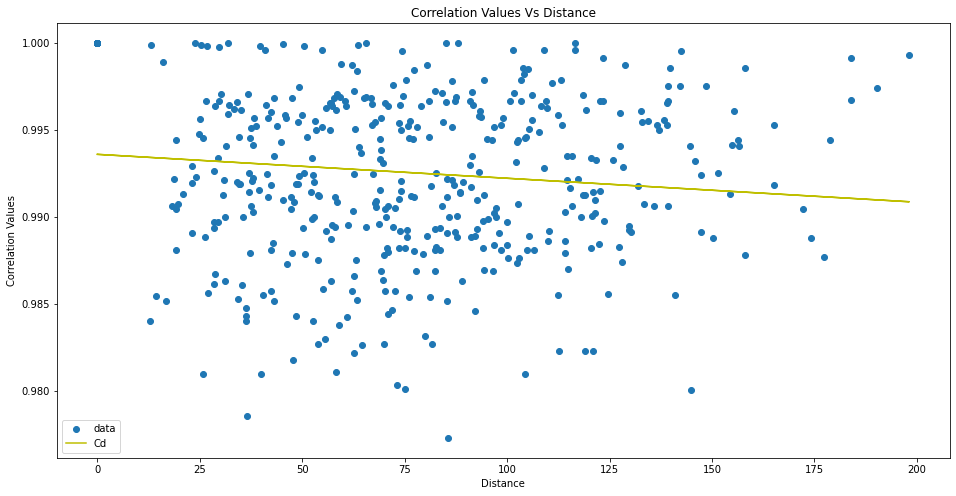

In [138]:
# Here we create a figure with a size of 16x8. We then plot a scatter plot of the dist_x and corr_y data points, with the label 'data'. After this we overlay a plot of the fitted c_zero function 
# using the params obtained from curve_fit. We label the plot with appropriate axis labels and a title, and a legend is added to distinguish between the two lines. 
plt.figure(figsize=(16,8))
plt.scatter(dist_x, corr_y, label='data')
plt.plot(dist_x, c_zero(dist_x, *params), 'y-', label='Cd')
plt.xlabel('Distance')
plt.title('Correlation Values Vs Distance')
plt.ylabel('Correlation Values')
plt.legend()
plt.show()

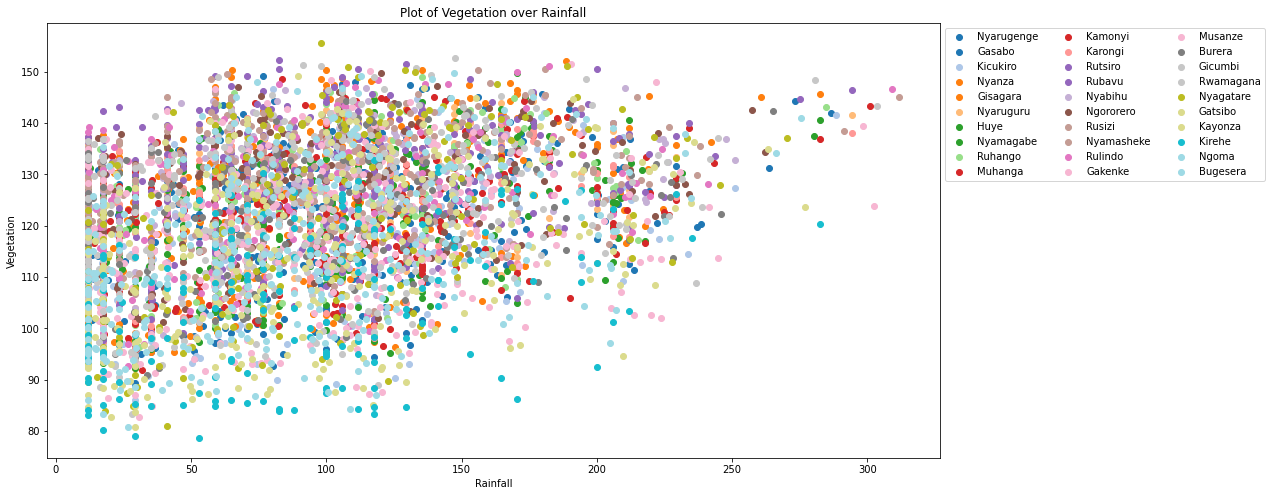

In [139]:
# Here we convert the values in the "rainfall" and "vegetation" data frames to numeric values. We then select all rows of the "rainfall" data frame starting from the 4th column. After that we 
# create a scatter plot of vegetation vs rainfall for each district in the "districts_rainfall" list, with each district represented by a different color. The x-axis of the plot represents rainfall 
# and the y-axis represents vegetation. The title of the plot is given as "Vegetation vs Rainfall", and we included the legend indicating which color corresponds to each district. 
rainfall = rainfall.apply(pd.to_numeric)
vegetation = vegetation.apply(pd.to_numeric)
rainfall = rainfall.iloc[:, 4:]

plt.figure(figsize=(16,8))
color=plt.cm.tab20(np.linspace(0,1,30))

for district in districts_rainfall:
    rainfall_month_district=rainfall.loc[district].values.astype('float64')
    vegetation_month_district=vegetation.loc[district].values.astype('float64')
    plt.scatter(rainfall_month_district,vegetation_month_district,color=color[districts_rainfall.index(district)],label=district)
    
plt.xlabel('Rainfall')
plt.ylabel('Vegetation')
plt.title('Plot of Vegetation over Rainfall')
plt.legend(bbox_to_anchor=(1,1),ncol=3)
plt.show()

{'Nyarugenge': 1, 'Gasabo': 1, 'Kicukiro': 1, 'Nyanza': 1, 'Gisagara': 1, 'Nyaruguru': 1, 'Huye': 1, 'Nyamagabe': 1, 'Ruhango': 1, 'Muhanga': 1, 'Kamonyi': 1, 'Karongi': 1, 'Rutsiro': 1, 'Rubavu': 1, 'Nyabihu': 1, 'Ngororero': 1, 'Rusizi': 1, 'Nyamasheke': 1, 'Rulindo': 1, 'Gakenke': 1, 'Musanze': 1, 'Burera': 1, 'Gicumbi': 1, 'Rwamagana': 1, 'Nyagatare': 1, 'Gatsibo': 1, 'Kayonza': 1, 'Kirehe': 1, 'Ngoma': 1, 'Bugesera': 1}


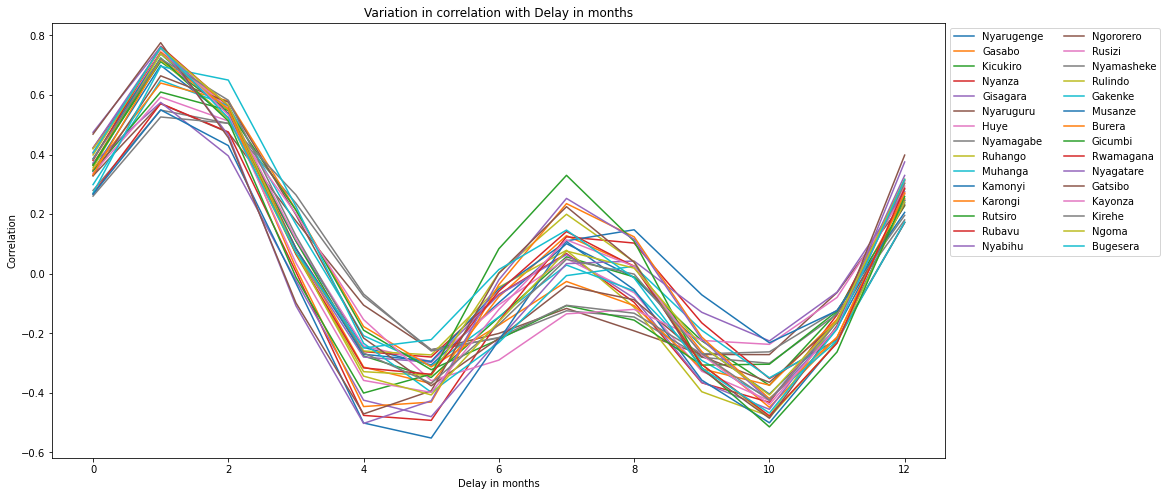

In [140]:
# Here we compute the correlation between delayed rainfall and vegetation for different districts with a delay varying from 0 to 12 months. The maximum correlation delay for each district is 
# stored in the delay_dic dictionary. The plot shows the variation in correlation with delay for each district. The x-axis represents the delay in months, the y-axis represents the correlation value, 
# and each line corresponds to a different district. We also include the plot with a title and legend
rainfall_ = rainfall.copy()
delay_dic={}
plt.figure(figsize=(16,8))

for i, district in enumerate(districts_rainfall):
    corr=[]
    for k in range(0,13):
        delayed_rainfall = rainfall_.loc[district].astype('float32').values[:-k] if k>0 else rainfall_.loc[district].astype('float32').values[0:]
        delayed_vegetation = vegetation.loc[district].astype('float32').values[k:]
        corr.append(np.corrcoef(delayed_rainfall,delayed_vegetation)[0][1])
    max_k=np.argmax(np.array(corr))
    plt.plot(range(13),corr,label=district)
    delay_dic[district] = max_k
    
print(delay_dic)

plt.title('Variation in correlation with Delay in months')
plt.xlabel('Delay in months')
plt.ylabel('Correlation')
plt.legend(bbox_to_anchor=(1,1),ncol=2)


3


Text(0, 0.5, 'Coefficient of Correlation ')

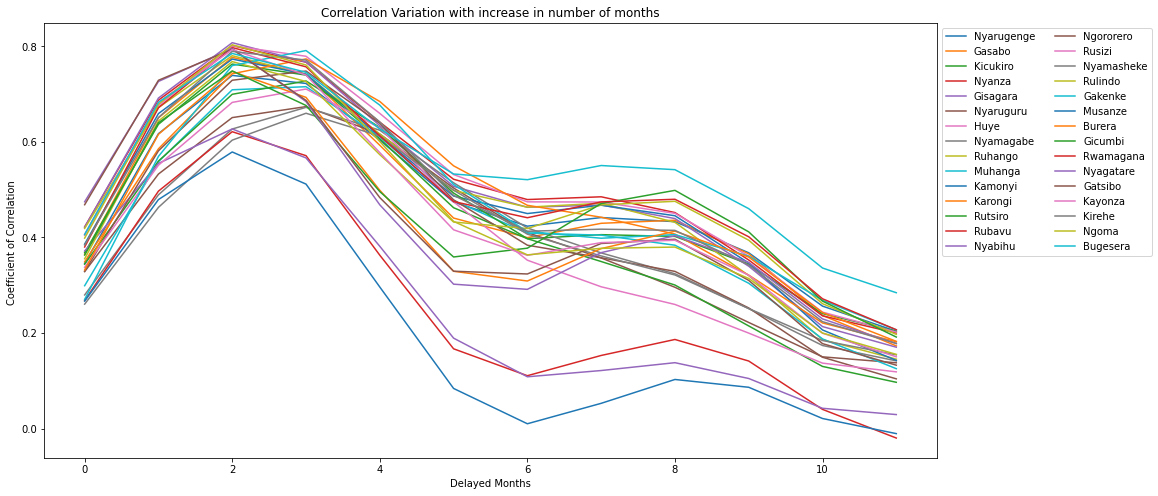

In [141]:
# Here we compute the correlation between the rainfall and vegetation data for each district in the dataset using the moving average method. We iterate through each district and for each district, 
# we compute the correlation coefficient for the rainfall and vegetation data after applying a moving average to the rainfall data with different window sizes ranging from 1 to 12 months. We then store
# the window size that produced the highest correlation in a dictionary and plot the correlation coefficient for each district against the window size. Finally we print the window size that produced 
# the highest correlation for the last district in the dataset

sma_dic={}
plt.figure(figsize=(16,8))
for i in range(30):
    corr=[]
    for n in range(1,13):
        sma_rainfall_district=rainfall_.astype('float32').rolling(n,1,axis=1).mean().loc[districts_rainfall[i]].values
        sma_vegetation_district=vegetation.astype('float32').loc[districts_rainfall[i]].values
        corr.append(np.corrcoef(sma_rainfall_district,sma_vegetation_district)[0][1])
    max_n=1+np.argmax(corr)
    sma_dic[districts_rainfall[i]]=max_n
    plt.plot(range(12),corr,label=districts_rainfall[i])
print(max_n)
plt.legend(bbox_to_anchor=(1,1),ncol=2)
plt.title('Correlation Variation with increase in number of months')
plt.xlabel('Delayed Months')
plt.ylabel('Coefficient of Correlation ')


In [142]:
# Here we define a list of estimates by calling the function c_zero with arguments dist_x and params. We then convert the estimates to a list and assigns them to the variable estimates. 
# At the end, the rainfall data is flattened and converted to a NumPy array with float32 data type and assigned to the variable rainfall_raw.

estimates = c_zero(dist_x, *params)
estimates = estimates.tolist()
# print(type(estimates))

rainfall_raw = rainfall_.astype('float32').values.ravel()
# print(rainfall_raw)
# print(type(rainfall_raw))
# print(len(rainfall_raw))

In [143]:
# Here we read a CSV file named "RwandaDistrictVegetation.csv" into a pandas dataframe named "vegetation". The second line drops all columns with any missing values in the dataframe. 
# The third line sets the index of the dataframe to be the values in the first column, and the fourth line sets the column names to be the values in the "District" row. 
# The fifth line removes the "District" row from the dataframe. Finally, the last line creates a one-dimensional numpy array "vegetation_raw" by flattening the dataframe and converting
#  its values to float32 data type.

vegetation=pd.read_csv("RwandaDistrictVegetation.csv")
vegetation.dropna(axis=1,inplace=True)
vegetation.set_index([vegetation.columns[0]],inplace=True)
vegetation.columns=vegetation.loc['District']
vegetation.drop(index='District',inplace=True)
vegetation_raw=vegetation.astype('float32').values.ravel()

# print(vegetation_raw)
# print(type(vegetation_raw))
# print(len(vegetation_raw))

In [144]:
# Here we define three functions: cubic, quadratic, and linear, which respectively calculate the cubic, quadratic, and linear functions. # We also define a function adjusted_r2 which returns the 
# adjusted R2 score given the regular R2 score, number of samples and number of predictors. The function reg_model takes two input arrays, rainfall_raw and vegetation_raw, and fits the three 
# regression models (linear, quadratic, cubic) using the curve_fit function from SciPy.We then calculate the R2, adjusted R2, and RMSE scores for each model, store them in a dictionary diction,
# and returns a pandas DataFrame with the scores for the three models.
def cubic(x,a,b,c,d):
    return a*(x**3)+b*(x**2)+c*x+d

def quadratic(x,a,b,c):
    return a*(x**2)+b*x+c

def linear(x,a,b):
    return a*x+b
    
def adjusted_r2(r2,n,p):
    return 1-((1-r2)*(n-1)/(n-p-1))

def reg_model(rainfall_raw,vegetation_raw):
    diction={}
    linear_params,_=curve_fit(linear,rainfall_raw,vegetation_raw)
    linear_estimates=[linear(x,*linear_params) for x in rainfall_raw]
    
    quadratic_params,_=curve_fit(quadratic,rainfall_raw,vegetation_raw)
    quadratic_estimates=[quadratic(x,*quadratic_params) for x in rainfall_raw]
    
    cubic_params,_=curve_fit(cubic,rainfall_raw,vegetation_raw)
    cubic_estimates=[cubic(x,*cubic_params) for x in rainfall_raw]
    
    #R2 Score
    linear_score=r2_score(vegetation_raw,linear_estimates)
    quadratic_score=r2_score(vegetation_raw,quadratic_estimates)
    cubic_score=r2_score(vegetation_raw,cubic_estimates)
    diction['R2']=[linear_score,quadratic_score,cubic_score]
    
    #Adj_R2 Score
    linear_score=adjusted_r2(r2_score(vegetation_raw,linear_estimates),len(estimates),1)
    quadratic_score=adjusted_r2(r2_score(vegetation_raw,quadratic_estimates),len(estimates),1)
    cubic_score=adjusted_r2(r2_score(vegetation_raw,cubic_estimates),len(estimates),1)
    diction['Adjusted R2']=[linear_score,quadratic_score,cubic_score]
    
    #RMSE Score
    linear_score=mean_squared_error(vegetation_raw,linear_estimates,squared=False)
    quadratic_score=mean_squared_error(vegetation_raw,quadratic_estimates,squared=False)
    cubic_score=mean_squared_error(vegetation_raw,cubic_estimates,squared=False)
    diction['RMSE']=[linear_score,quadratic_score,cubic_score]
        
    return pd.DataFrame(diction,index=['Linear','Quadratic','Cubic'])


## Rainfall

In [145]:
# This is a function that takes in two numpy arrays as input, rainfall_raw and vegetation_raw, which represent the rainfall and vegetation data, respectively. This function then fits three different 
# regression models (linear, quadratic, and cubic) to the data using the curve_fit() function from the scipy.optimize module, and calculate various evaluation metrics (R2 score, adjusted R2 score, and
#  RMSE score) for each model using functions from the sklearn.metrics module. Finally, we return a pandas DataFrame containing the evaluation metrics for each of the three regression models.
reg_model(rainfall_raw,vegetation_raw)

,R2,Adjusted R2,RMSE
Linear,0.109453,0.107529,13.197640
Quadratic,0.116198,0.114289,13.147566
Cubic,0.118972,0.117069,13.126913


In [146]:
# Here we read a CSV file containing rainfall data for Rwanda, drop missing values and the first row, rename columns to month names and set the month as the index. We then select columns starting from
# the fifth column and assign the resulting dataframe to rainfall3. Finally, we print rainfall3 and the data type of rainfall3
rainfall=pd.read_csv(r"RwandaDistrictRainfall.csv")
rainfall.dropna(inplace=True)
rainfall2=rainfall.drop(index=0)
rainfall2.columns=rainfall[rainfall['Year']=='Month'].values.flatten()
rainfall2.set_index(['Month'],inplace=True)
rainfall3 = rainfall2.iloc[:,4:]
# print(rainfall3)
# print(type(rainfall3))

## Delayed Rainfall

In [147]:
# We create two variables delayed_rainfall_raw and delayed_vegetation_raw by converting the rainfall3 and vegetation dataframes into NumPy arrays of type float32, and then flattening them into a 1D array.
# The reg_model function is then called with these two arrays as input, which performs a regression analysis on the data and returns a dataframe containing the R2, adjusted R2, and RMSE scores 
# for linear, quadratic, and cubic models.

delayed_rainfall_raw = rainfall3.astype('float32').values[:,:-1].ravel()
delayed_vegetation_raw = vegetation.astype('float32').values[:,1:].ravel()
reg_model(delayed_rainfall_raw,delayed_vegetation_raw)

,R2,Adjusted R2,RMSE
Linear,0.388732,0.387412,10.944063
Quadratic,0.446825,0.445630,10.411039
Cubic,0.449767,0.448579,10.383314


## SMA Rainfall

In [148]:
# In the first line we calculate a simple moving average for each row of the rainfall data using a rolling window of size 3, and then the resulting array is flattened into a 1D array. 
# In the second line, the vegetation data is converted to a 1D array of float32 type. In the third line, the reg_model function is called with the 1D arrays of SMA rainfall and vegetation data
# as input to obtain a regression analysis.
sma_rainfall_raw=rainfall3.astype('float32').rolling(3,1,axis=1).mean().values.ravel()
sma_vegetation_raw=vegetation.astype('float32').values.ravel()
reg_model(sma_rainfall_raw,sma_vegetation_raw)

,R2,Adjusted R2,RMSE
Linear,0.447841,0.446648,10.392019
Quadratic,0.466042,0.464889,10.219302
Cubic,0.467186,0.466035,10.208349


In [149]:
def reg_model_train_test_split(rainfall_raw,vegetation_raw):
    diction={}
    # Define polynomial features
    X_train,X_test,y_train,y_test=train_test_split(rainfall_raw,vegetation_raw,test_size=0.2,random_state=42)
    X_train=X_train.reshape(-1,1)
    X_test=X_test.reshape(-1,1)
    poly_features = PolynomialFeatures(degree=2)
    cubic_features = PolynomialFeatures(degree=3)
    X_poly_train,X_poly_test = poly_features.fit_transform(X_train),poly_features.fit_transform(X_test)
    X_cubic_train,X_cubic_test = cubic_features.fit_transform(X_train),cubic_features.fit_transform(X_test)

    linear_reg=LinearRegression()
    quadratic_reg = LinearRegression()
    cubic_reg = LinearRegression()

    linear_reg.fit(X_train,y_train)
    quadratic_reg.fit(X_poly_train,y_train)
    cubic_reg.fit(X_cubic_train,y_train)

    #R2
    linear_score=r2_score(y_test,linear_reg.predict(X_test))
    quadratic_score=r2_score(y_test,quadratic_reg.predict(X_poly_test))
    cubic_score=r2_score(y_test,cubic_reg.predict(X_cubic_test))
    diction['R2']=[linear_score,quadratic_score,cubic_score]

    #ADJUSTED_R2
    linear_score=adjusted_r2(r2_score(y_test,linear_reg.predict(X_test)),len(y_test.flatten()),1)
    quadratic_score=adjusted_r2(r2_score(y_test,quadratic_reg.predict(X_poly_test)),len(y_test.flatten()),1)
    cubic_score=adjusted_r2(r2_score(y_test,cubic_reg.predict(X_cubic_test)),len(y_test.flatten()),1)
    diction['Adjusted R2']=[linear_score,quadratic_score,cubic_score]

    #RMSE
    linear_score=mean_squared_error(y_test,linear_reg.predict(X_test),squared=False)
    quadratic_score=mean_squared_error(y_test,quadratic_reg.predict(X_poly_test),squared=False)
    cubic_score=mean_squared_error(y_test,cubic_reg.predict(X_cubic_test),squared=False)
    diction['RMSE']=[linear_score,quadratic_score,cubic_score]

    return pd.DataFrame(diction,index=['Linear','Quadratic','Cubic'])

## Rainfall

In [150]:
# Here we convert the rainfall3 and vegetation dataframes to flattened numpy arrays of float32 type and then we pass them as input to the reg_model_train_test_split() function, 
# which fits a regression model using a train-test split approach and returns the performance metrics of the model.

rainfall_raw=rainfall3.astype('float32').values.ravel()
vegetation_raw=vegetation.astype('float32').values.ravel()
reg_model_train_test_split(rainfall_raw,vegetation_raw)

,R2,Adjusted R2,RMSE
Linear,0.121464,0.120630,12.892080
Quadratic,0.127287,0.126459,12.849282
Cubic,0.129501,0.128675,12.832977


## Delayed Rainfall

In [151]:
# Here we convert two dataframes, rainfall3 and vegetation, into flattened numpy arrays of float32 data type using the astype() method, remove the last column of rainfall3 and the first column of
# vegetation. I have stored the the resulting arrays in the variables delayed_rainfall_raw and delayed_vegetation_raw. The delayed_rainfall_raw and delayed_vegetation_raw variables are passed as arguments
# to this function, this allows the function to use the flattened rainfall and vegetation data for model training and testing.

delayed_rainfall_raw=rainfall3.astype('float32').values[:,:-1].ravel()
delayed_vegetation_raw=vegetation.astype('float32').values[:,1:].ravel()
reg_model_train_test_split(delayed_rainfall_raw,delayed_vegetation_raw)

,R2,Adjusted R2,RMSE
Linear,0.386537,0.385951,11.234988
Quadratic,0.442118,0.441586,10.713943
Cubic,0.443006,0.442475,10.705413


## SMA Rainfall

In [152]:
# Here we create a simple moving average of the rainfall data and then use it along with vegetation data to train and test a regression model using the reg_model_train_test_split function. 
# The SMA rainfall data is first calculated by taking the rolling average of the rainfall data with a window size of 3, and then we flattened into a 1D array. The vegetation data is also flattened 
# into a 1D array. These arrays are then passed to the reg_model_train_test_split function to create a train/test split and fit a regression model.

sma_rainfall_raw=rainfall3.astype('float32').rolling(3,1,axis=1).mean().values.ravel()
sma_vegetation_raw=vegetation.astype('float32').values.ravel()
reg_model_train_test_split(sma_rainfall_raw,sma_vegetation_raw)

,R2,Adjusted R2,RMSE
Linear,0.461471,0.460960,10.093636
Quadratic,0.470954,0.470452,10.004375
Cubic,0.467907,0.467403,10.033138


## Delayed SMA Rainfall

In [153]:
# Here we create a delayed and smoothed version of the rainfall data, and select only the relevant values for vegetation. Then it uses the reg_model_train_test_split function to train and test 
# a regression model using the delayed and smoothed rainfall data and vegetation data

delayed_sma_rainfall_raw=rainfall3.astype('float32').rolling(3,1,axis=1).mean().values[:,:-1].ravel()
delayed_sma_vegetation_raw=vegetation.astype('float32').values[:,1:].ravel()
reg_model_train_test_split(delayed_sma_rainfall_raw,delayed_sma_vegetation_raw)

,R2,Adjusted R2,RMSE
Linear,0.305926,0.305264,11.950366
Quadratic,0.341847,0.341219,11.637020
Cubic,0.341017,0.340388,11.644353


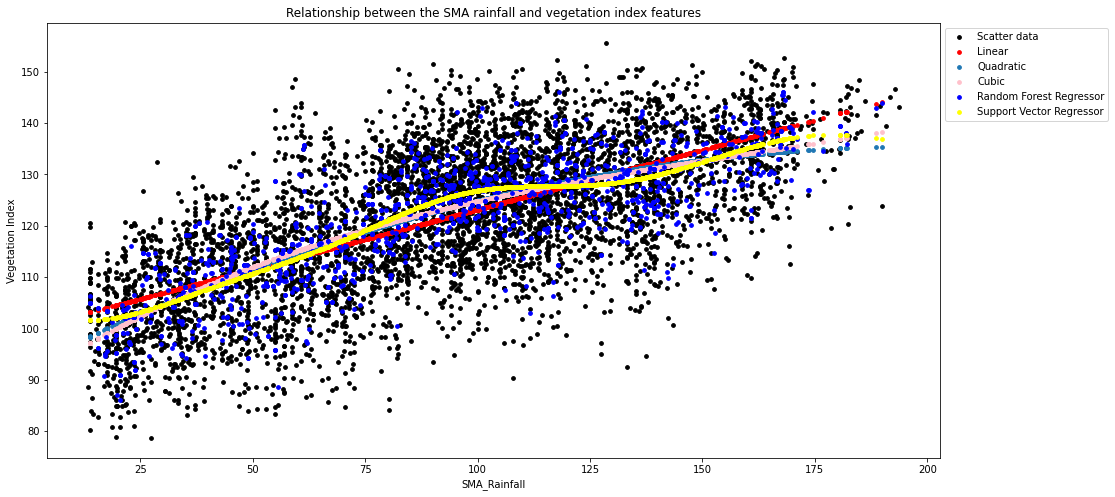

In [166]:
X_train,X_test,y_train,y_test = train_test_split(sma_rainfall_raw,sma_vegetation_raw,test_size = 0.25,random_state = 1234)

X_train=X_train.astype('float32').ravel()
X_test=X_test.astype('float32').ravel()

linear_reg_params,_=curve_fit(linear,X_train,y_train)
linear_estimates=[linear(x,*linear_reg_params) for x in X_test]

quadratic_reg_params,_=curve_fit(quadratic,X_train,y_train)
quadratic_estimates=[quadratic(x,*quadratic_reg_params) for x in X_test]

cubic_reg_params,_=curve_fit(cubic,X_train,y_train)
cubic_estimates=[cubic(x,*cubic_reg_params) for x in X_test]

RF_clf=RandomForestRegressor(n_estimators = 10, random_state = 42)
RF_clf.fit(X_train.reshape(-1,1),y_train)
RF_estimates=RF_clf.predict(X_test.reshape(-1,1))

SVR_clf=SVR()
SVR_clf.fit(X_train.reshape(-1,1),y_train)
SVR_estimates=SVR_clf.predict(X_test.reshape(-1,1))

plt.figure(figsize=(16,8))
plt.scatter(sma_rainfall_raw,sma_vegetation_raw,label='Scatter data',s = 14, c = "black")
plt.scatter(X_test,linear_estimates,label='Linear',s = 14, color = "red")
plt.scatter(X_test,quadratic_estimates,label='Quadratic',s = 14)
plt.scatter(X_test,cubic_estimates,label='Cubic',s = 14, color = "pink")
plt.scatter(X_test,RF_estimates,label='Random Forest Regressor',color = 'blue', s = 14)
plt.scatter(X_test,SVR_estimates,label='Support Vector Regressor', color = "yellow", s = 14)
plt.title('Relationship between the SMA rainfall and vegetation index features')
plt.xlabel('SMA_Rainfall')
plt.ylabel('Vegetation Index')
plt.legend(bbox_to_anchor=(1,1))